# The Image Class
This notebook introduces the image class and how to access the different elements

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import phenoscope as ps

## Loading in data

Let's load in an image of a colony

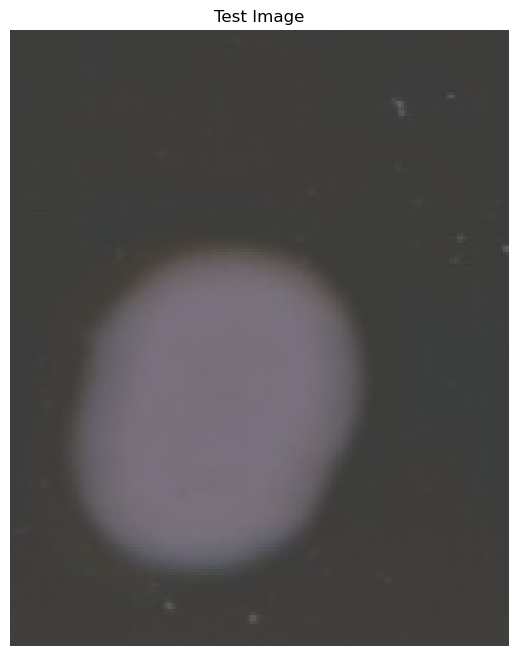

In [2]:
# Load in a numpy array with the image data for a fungal colony at 12 hours
test_image = ps.data.load_colony_72hr()

# Display the image
plt.figure(figsize=(8, 8))
plt.imshow(test_image)
plt.title("Test Image")
plt.axis('off')
plt.show()

## Loading the Image into PhenoScope

Now let's load this image into a PhenoScope `Image` object.

> Note: 
    - Every Image object is assigned a UUID at creation. This is used for interacting with other image processing software
    - When creating the class, if no name was given as input, the name is automatically set to the UUID. The name can be changed at any time however
    - When visualizing image, if not title is provided to Image.show(), the title is defaulted to the name

Image shape: (200, 162, 3)
Image schema: RGB


(<Figure size 900x1000 with 1 Axes>,
 <Axes: title={'center': 'ab06e990-a0ed-4d86-be0b-72b09a3117a5'}>)

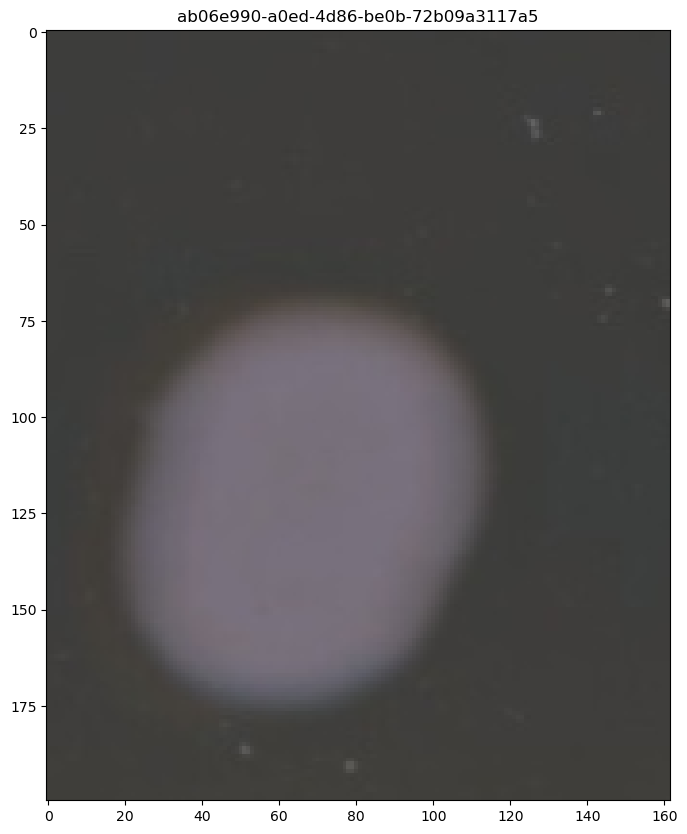

In [3]:
# Create an Image object from the numpy array
img = ps.Image(test_image, input_schema='RGB')
print(f"Image shape: {img.shape}")
print(f"Image schema: {img.schema}")
img.show()

# Accessing Image Componenent Elements
In order to access the components of each image as an array, the components must be sliced. However, many helper functions were addded to mimic normal numpy array behavior as well.

In [4]:

image_array = img.array # Without using a key to access elements the accessor object is returned
print(f"Image.array: Type={type(image_array)}, Shape={image_array.shape}")

image_array = img.array[:] # Using indexing instead of test_image.array
print(f"Image.array[:]: Type={type(image_array)}, Shape={image_array.shape}")

image_array = img.matrix # Without using a key to access elements the accessor object is returned
print(f"Image.matrix: Type={type(img.matrix)}, Shape={image_array.shape}")

image_matrix = img.matrix[:] # Using indexing insteead of test_image.matrix
print(f"Image Matrix: Type={type(image_matrix)}, Shape={image_matrix.shape}")

Image.array: Type=<class 'phenoscope.core.accessors._image_array_accessor.ImageArray'>, Shape=(200, 162, 3)
Image.array[:]: Type=<class 'numpy.ndarray'>, Shape=(200, 162, 3)
Image.matrix: Type=<class 'phenoscope.core.accessors._image_matrix_accessor.ImageMatrix'>, Shape=(200, 162)
Image Matrix: Type=<class 'numpy.ndarray'>, Shape=(200, 162)


## Streamlined Prototyping
See your image faster

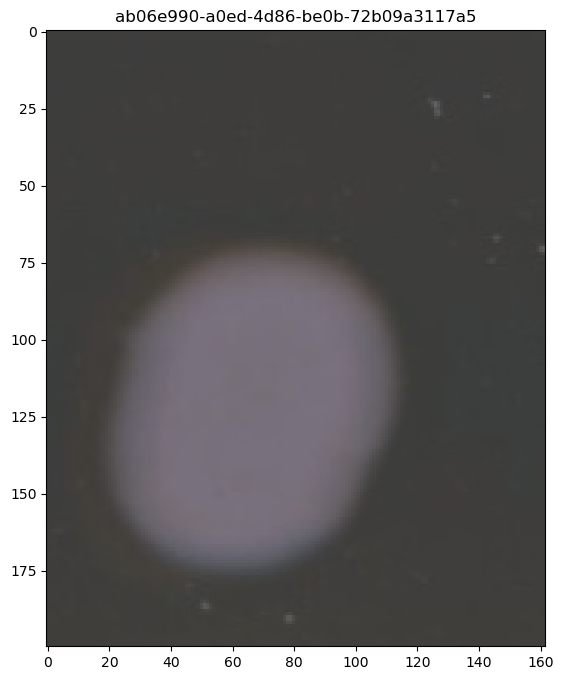

In [5]:
fig, ax = img.show(figsize=(8,8))


## Array/Matrix Sync

The Image class syncs information between the array and matrix representation. 

(<Figure size 640x480 with 4 Axes>, <Axes: title={'center': 'New Matrix'}>)

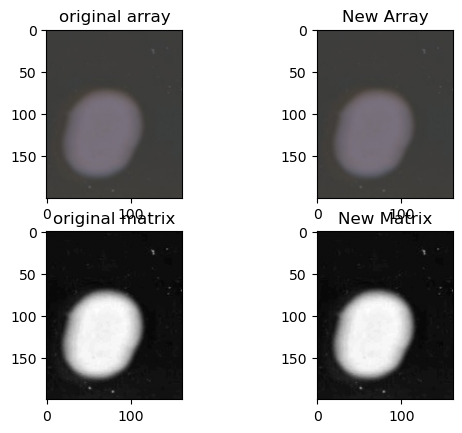

In [6]:
from phenoscope.preprocessing import MedianPreprocessor
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=2,ncols=2)
img.array.show(ax=axes[0,0], title='original array')
img.enh_matrix.show(ax=axes[1,0], title='original matrix')

MedianPreprocessor = MedianPreprocessor()
img = MedianPreprocessor.apply(img)

img.array.show(ax=axes[0,1],title='New Array')
img.enh_matrix.show(ax=axes[1,1],title='New Matrix')



Mean RGB values: R=74.2, G=72.0, B=72.5


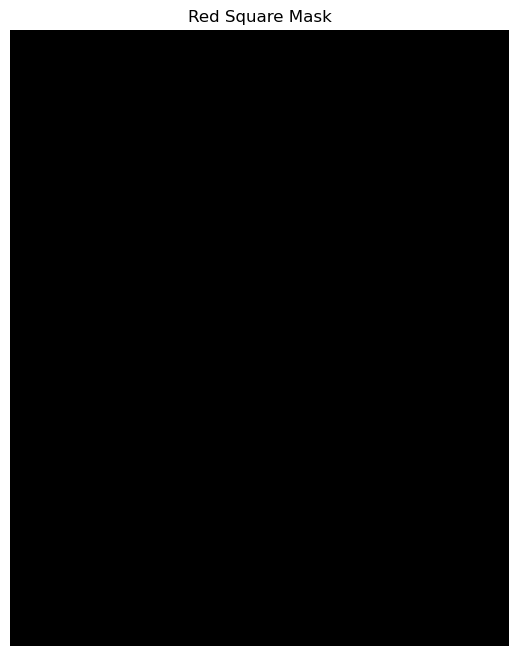

In [7]:
# Extract features from the image
# For demonstration, we'll just get some basic statistics
mean_values = np.mean(img.array[:], axis=(0, 1))
print(f"Mean RGB values: R={mean_values[0]:.1f}, G={mean_values[1]:.1f}, B={mean_values[2]:.1f}")

# Create a mask for the red square
red_mask = img.array[:, :, 0] > 200
plt.figure(figsize=(8, 8))
plt.imshow(red_mask, cmap='gray')
plt.title("Red Square Mask")
plt.axis('off')
plt.show()

## Conclusion

This notebook demonstrated basic image loading and analysis with PhenoScope. For more advanced features, check out the other examples.